## Portfolio Part 4: Air Quality

- **Data Source:** The dataset was obtained from Kaggle, specifically the "Air Quality Data Set" by Fedesoriano 

### Objective
Evaluate and compare the performance of various classification models used in predicting air quality.

### Features
- Date: The date of the measurement.
- Time: The time of the measurement (hourly intervals).
- CO(GT): The concentration of Carbon Monoxide in air (in mg/m³).
- PT08.S1(CO): The sensor value for Carbon Monoxide.
- NMHC(GT): The concentration of Non-Methane Hydrocarbons (in µg/m³).
- C6H6(GT): The concentration of Benzene (in µg/m³).
- PT08.S2(NMHC): The sensor value for Non-Methane Hydrocarbons.
- NOx(GT): The concentration of Nitrogen Oxides (in µg/m³).
- PT08.S3(NOx): The sensor value for Nitrogen Oxides.
- NO2(GT): The concentration of Nitrogen Dioxide (in µg/m³).
- PT08.S4(NO2): The sensor value for Nitrogen Dioxide.
- PT08.S5(O3): The sensor value for Ozone.
- T: Temperature in degrees Celsius.
- RH: Relative Humidity (%).
- AH: Absolute Humidity.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


## Data Exploratory

In [4]:
# Reading the data with a semicolon as the separator
data = pd.read_csv('DataPorto4/AirQuality.csv', sep=';', decimal=',', engine='python')

# Replacing unwanted spaces in decimal numbers
data = data.replace(r' ', '.', regex=True)

data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
# Removing irrelevant columns (empty columns)
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [6]:
# Combine the 'Date' and 'Time' columns with the appropriate format
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# Display a few rows to check if the merging was successful
print(data[['Date', 'Time', 'datetime']].head())

         Date      Time            datetime
0  10/03/2004  18.00.00 2004-03-10 18:00:00
1  10/03/2004  19.00.00 2004-03-10 19:00:00
2  10/03/2004  20.00.00 2004-03-10 20:00:00
3  10/03/2004  21.00.00 2004-03-10 21:00:00
4  10/03/2004  22.00.00 2004-03-10 22:00:00


In [7]:
data = data.drop(['Date', 'Time'], axis=1)
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [8]:
# Assuming air_quality_data_cleaned is your DataFrame
def classify_air_quality(row):
    if (row['CO(GT)'] <= 1.5 and
        row['C6H6(GT)'] <= 5.0):
        return 1  # Good air quality
    else:
        return 0  # Poor air quality

# Applying the function to the DataFrame
data['AirQuality'] = data.apply(classify_air_quality, axis=1)

In [9]:
# Count the number of unique values in the 'Air Quality' column
unique_values_count = data['AirQuality'].nunique()

# Display the number of unique values
print("Number of unique values in the 'Air Quality' column:", unique_values_count)

# If you want to see the unique values
unique_values = data['AirQuality'].unique()
print("Unique values in the 'Air Quality' column:", unique_values)

# Count the number of 0s and 1s in the 'Air Quality' column
value_counts = data['AirQuality'].value_counts()

# Display the counts of 0 and 1
count_0 = value_counts.get(0, 0)  # Using get to avoid KeyError if 0 does not exist
count_1 = value_counts.get(1, 0)  # Using get to avoid KeyError if 1 does not exist

print("Number of 0s in the 'Air Quality' column:", count_0)
print("Number of 1s in the 'Air Quality' column:", count_1)

Number of unique values in the 'Air Quality' column: 2
Unique values in the 'Air Quality' column: [0 1]
Number of 0s in the 'Air Quality' column: 6799
Number of 1s in the 'Air Quality' column: 2672


Focusing on the main pollutants like Carbon Monoxide (CO) and Benzene (C6H6) is really important because they have a big impact on health. By concentrating on these two, you can effectively assess air quality without complicating things. Plus, keeping the criteria simple makes the analysis easier to understand and helps reduce the chances of making mistakes. It also makes it clearer when sharing the results. The thresholds for CO and Benzene usually follow guidelines from health organizations like WHO so it ensures you're using reliable standards.

In [11]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,AirQuality
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357,9471.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004-09-21 16:00:00,0.282124
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00,0.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004-06-16 05:00:00,0.000000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004-09-21 16:00:00,0.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00,1.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00,1.000000
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,0.450057


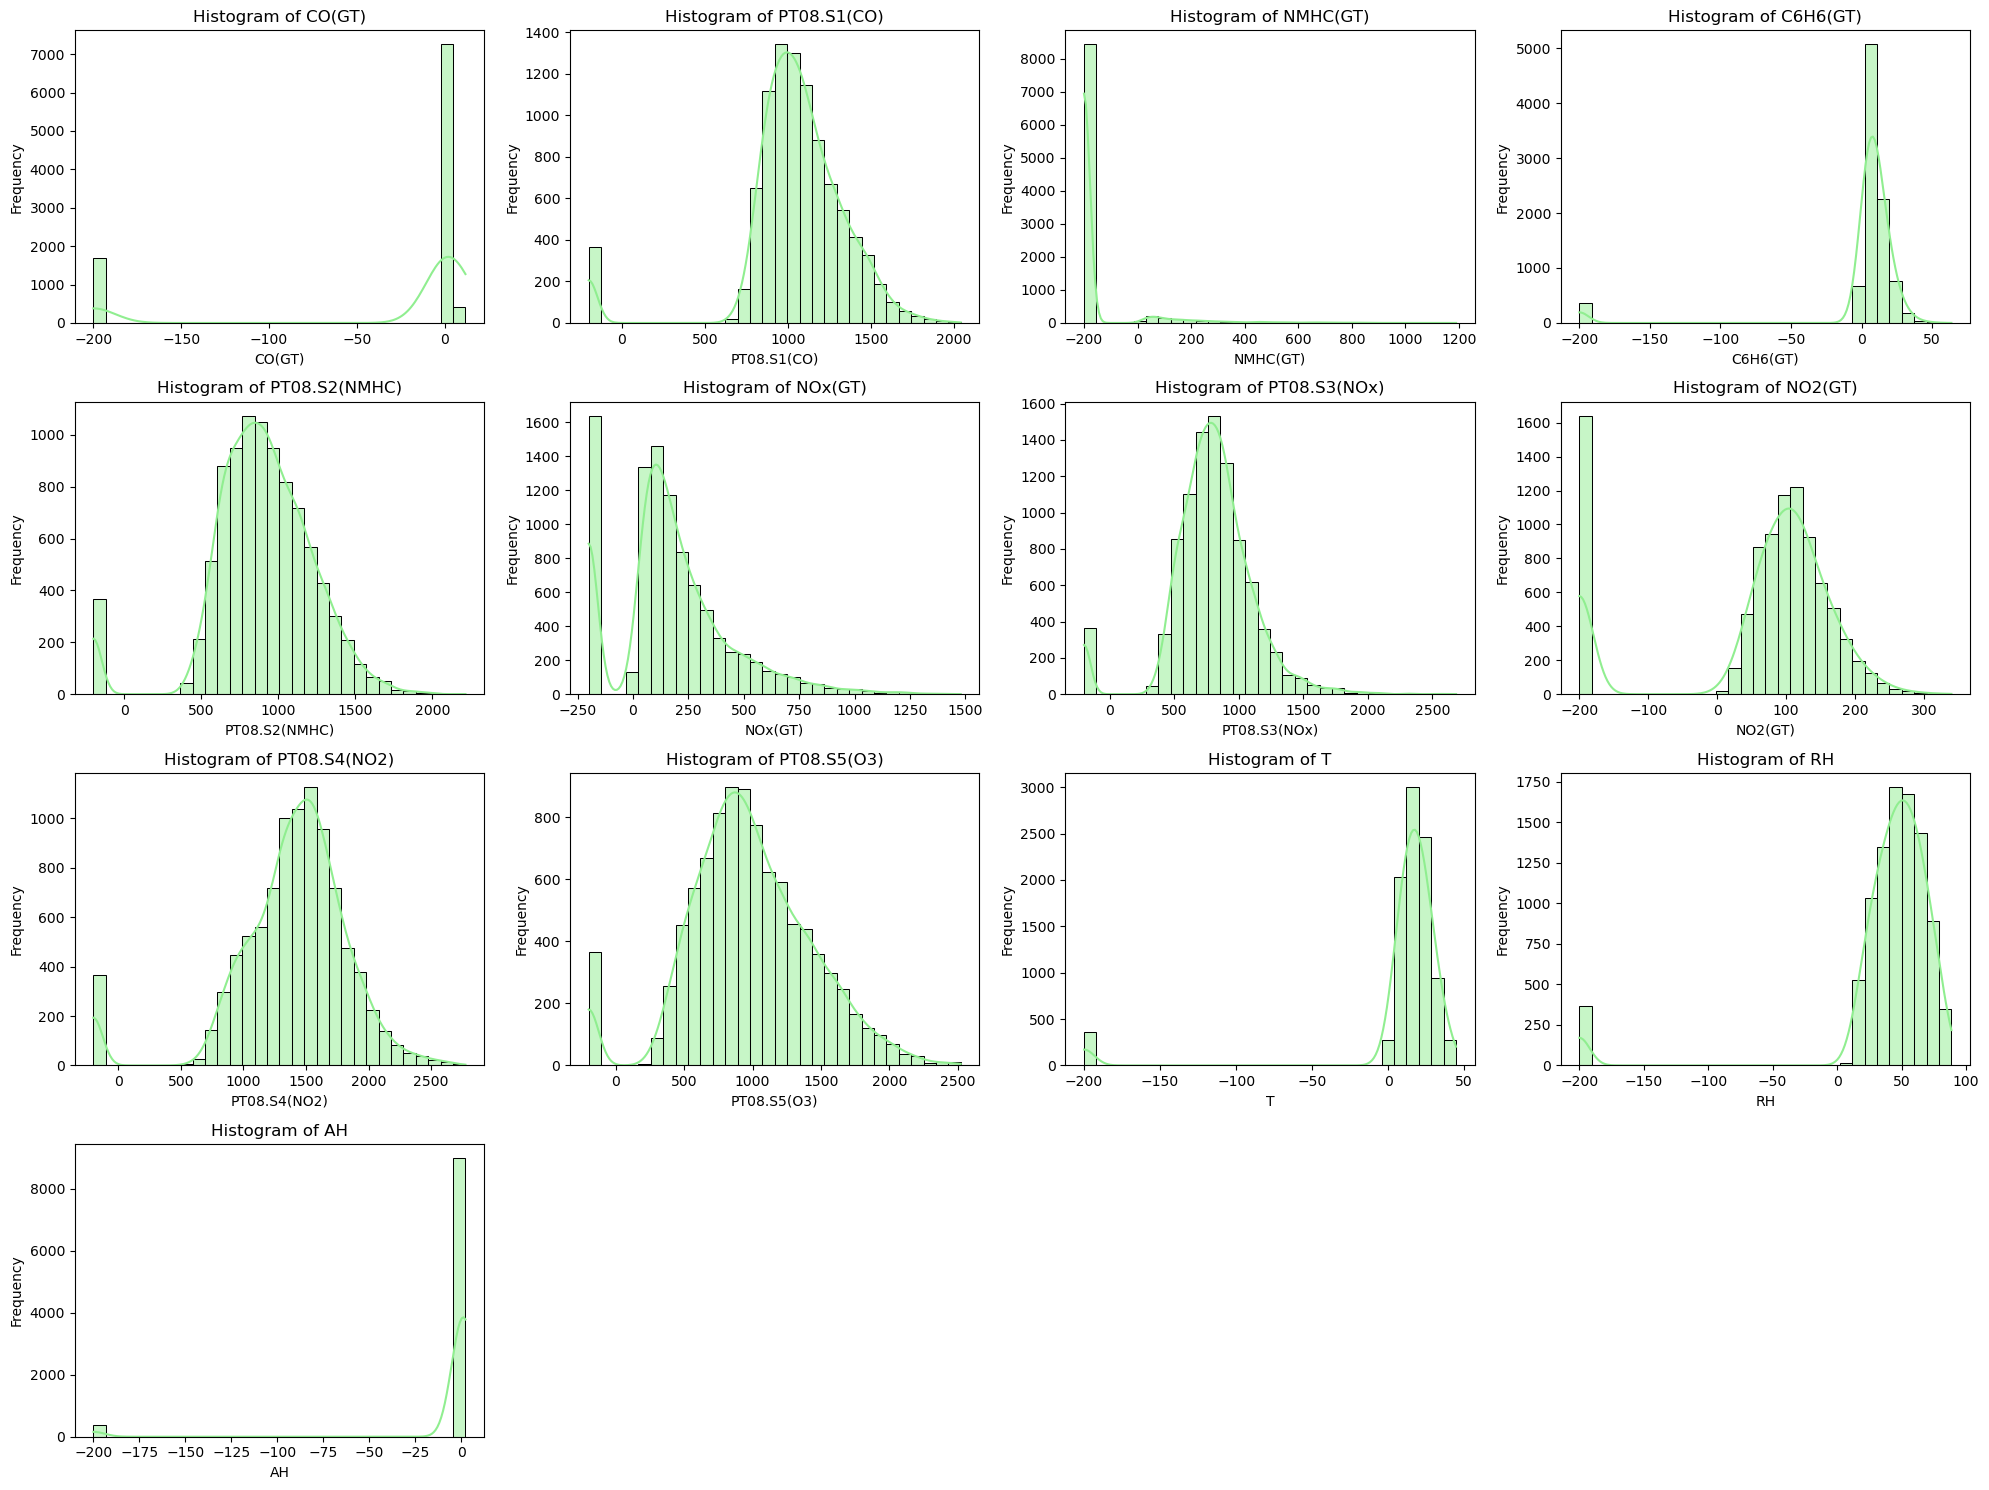

In [12]:
plt.figure(figsize=(20, 15))

# Create histograms for each numeric column in final_data
for i, column in enumerate(data.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)  # Adjust the subplot layout as necessary
    sns.histplot(data[column], bins=30, kde=True, color='lightgreen')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

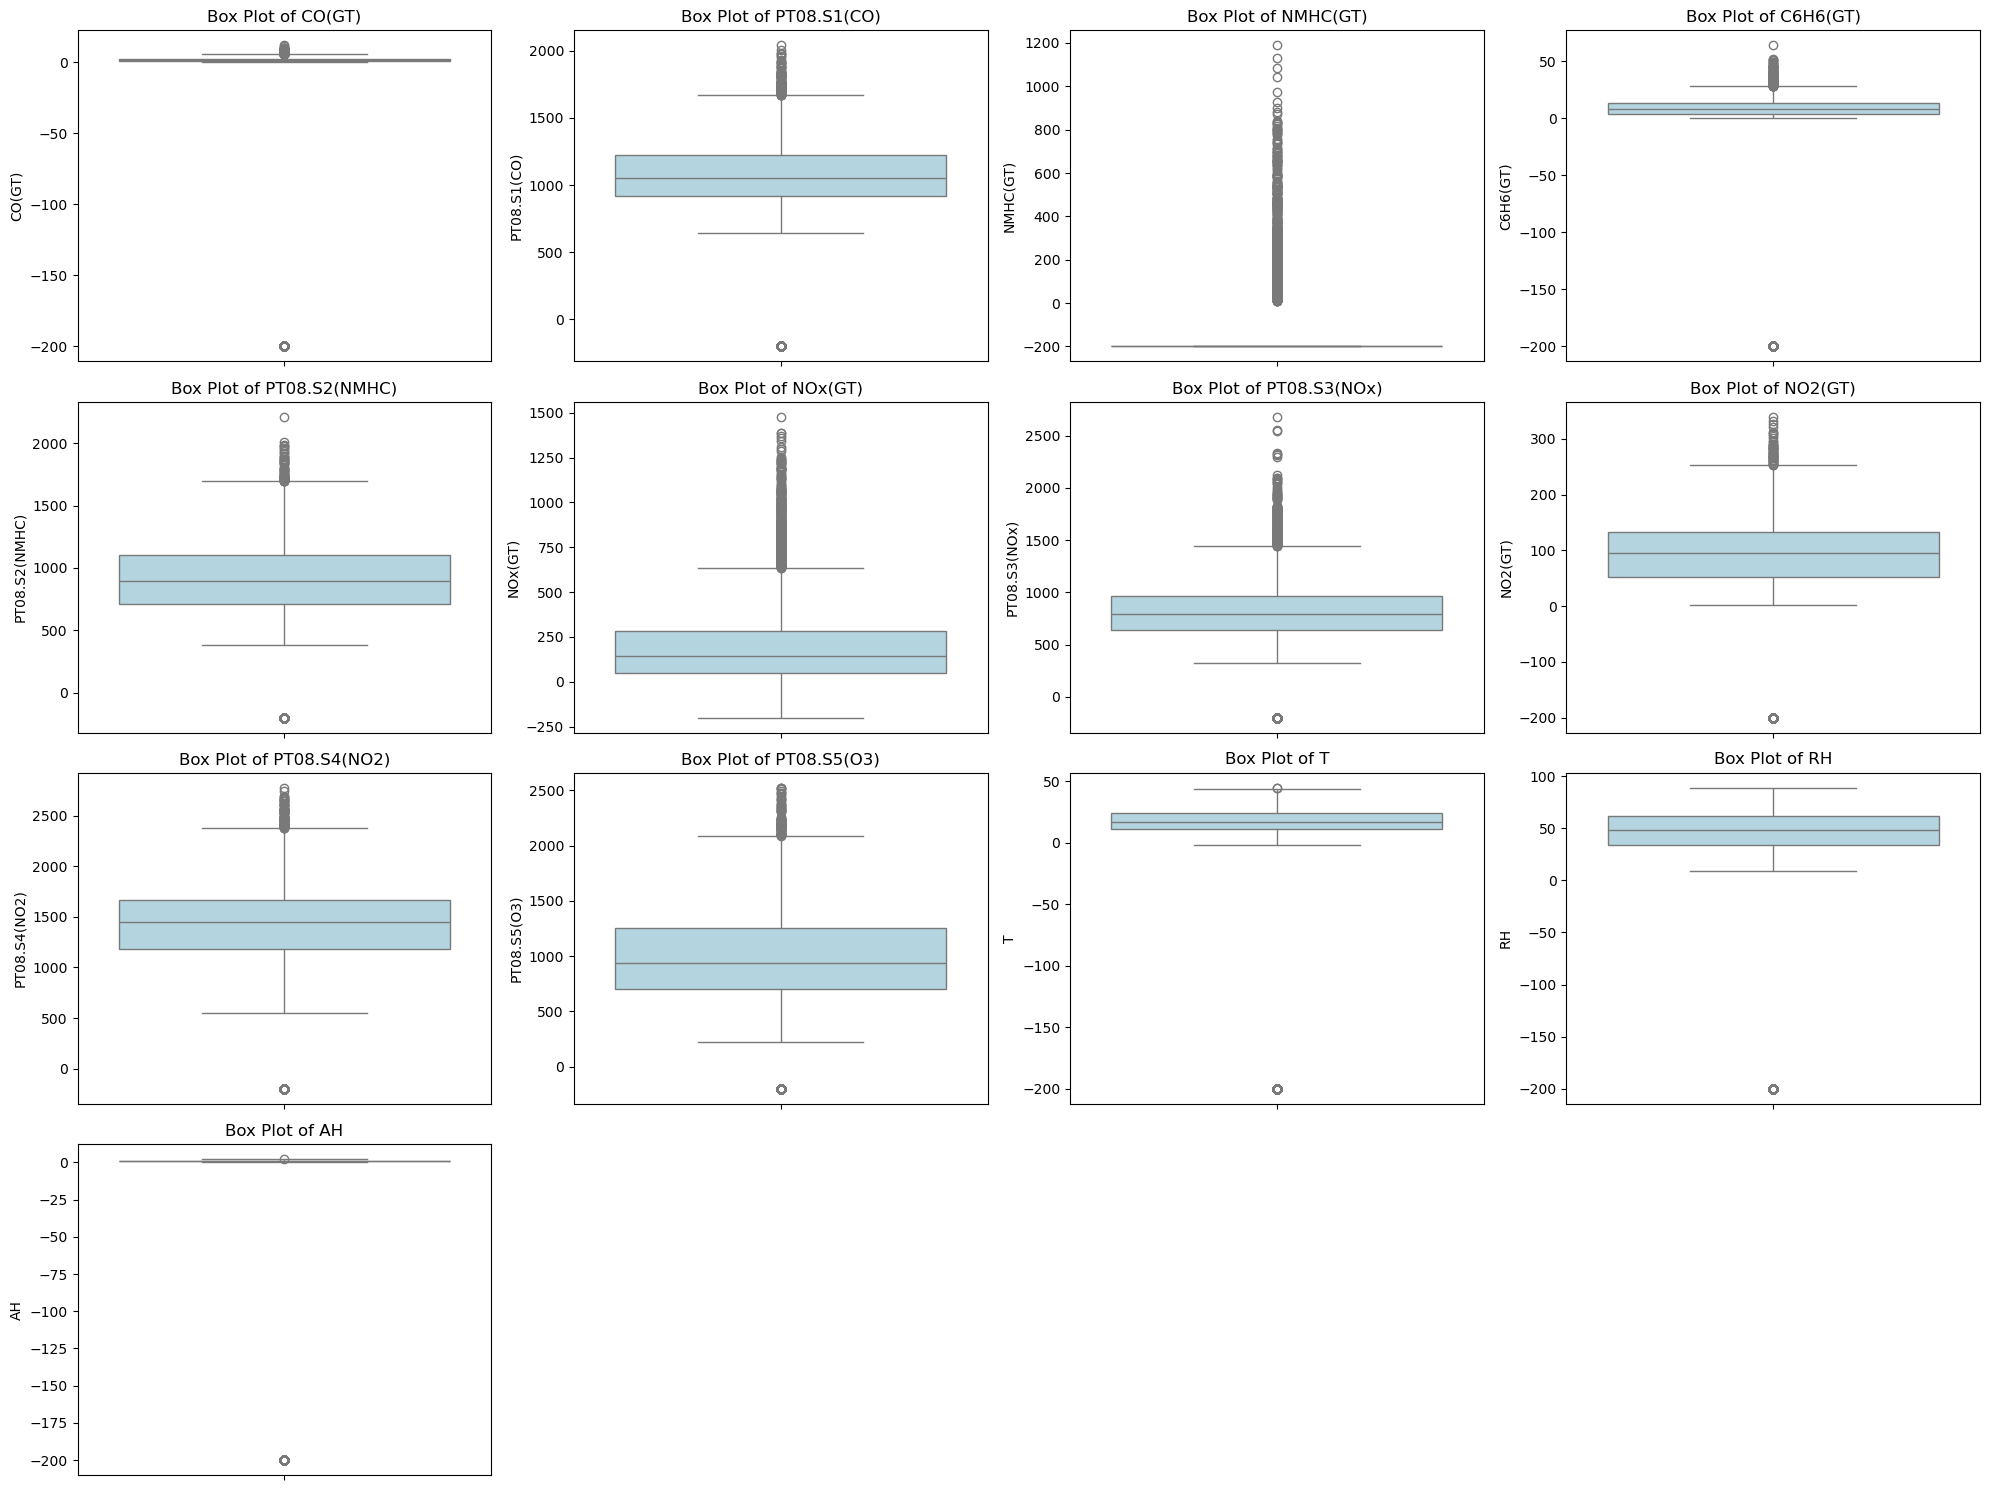

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create box plots for each numeric column in final_data
for i, column in enumerate(data.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)  # Adjust the subplot layout as necessary
    sns.boxplot(data, y=column, color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Data Cleaning

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  datetime       9357 non-null   datetime64[ns]
 14  AirQuality     9471 non-null   int64         
dtypes: datetime64[ns](1),

In [16]:
# Step 1: Replace -200 values with NaN for the relevant columns
negative_values = [-200.0]

# Replace negative values with NaN for specified columns
for column in data:
    data[column] = data[column].replace(negative_values, pd.NA)

# Step 2: Identify outliers for the relevant columns
# Using IQR method to identify outliers
outlier_info = {}

for column in data:
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_info[column] = outliers[column].count()  # Count of outliers in the column

# Display the count of outliers identified in each column
outlier_info, data.info()  # Show outlier counts and cleaned data info for verification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         7674 non-null   object        
 1   PT08.S1(CO)    8991 non-null   object        
 2   NMHC(GT)       914 non-null    object        
 3   C6H6(GT)       8991 non-null   object        
 4   PT08.S2(NMHC)  8991 non-null   object        
 5   NOx(GT)        7718 non-null   object        
 6   PT08.S3(NOx)   8991 non-null   object        
 7   NO2(GT)        7715 non-null   object        
 8   PT08.S4(NO2)   8991 non-null   object        
 9   PT08.S5(O3)    8991 non-null   object        
 10  T              8991 non-null   object        
 11  RH             8991 non-null   object        
 12  AH             8991 non-null   object        
 13  datetime       9357 non-null   datetime64[ns]
 14  AirQuality     9471 non-null   int64         
dtypes: datetime64[ns](1),

({'CO(GT)': 215,
  'PT08.S1(CO)': 118,
  'NMHC(GT)': 55,
  'C6H6(GT)': 228,
  'PT08.S2(NMHC)': 65,
  'NOx(GT)': 435,
  'PT08.S3(NOx)': 241,
  'NO2(GT)': 107,
  'PT08.S4(NO2)': 97,
  'PT08.S5(O3)': 93,
  'T': 3,
  'RH': 0,
  'AH': 2,
  'datetime': 0,
  'AirQuality': 0},
 None)

In [17]:
columns_to_convert = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
                      'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                      'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                      'T', 'RH', 'AH']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         7674 non-null   float64       
 1   PT08.S1(CO)    8991 non-null   float64       
 2   NMHC(GT)       914 non-null    float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
 13  datetime       9357 non-null   datetime64[ns]
 14  AirQuality     9471 non-null   int64         
dtypes: datetime64[ns](1),

Drop data with highest missing value and drop some data so the total number of non null is the same

In [19]:
# Drop the 'NMHC(GT)' column
data = data.drop(columns=['NMHC(GT)'])

# Now, drop rows with any missing values to standardize the dataset
data_cleaned = data.dropna()

# Display the cleaned dataset info to check the number of entries and remaining columns
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         6941 non-null   float64       
 1   PT08.S1(CO)    6941 non-null   float64       
 2   C6H6(GT)       6941 non-null   float64       
 3   PT08.S2(NMHC)  6941 non-null   float64       
 4   NOx(GT)        6941 non-null   float64       
 5   PT08.S3(NOx)   6941 non-null   float64       
 6   NO2(GT)        6941 non-null   float64       
 7   PT08.S4(NO2)   6941 non-null   float64       
 8   PT08.S5(O3)    6941 non-null   float64       
 9   T              6941 non-null   float64       
 10  RH             6941 non-null   float64       
 11  AH             6941 non-null   float64       
 12  datetime       6941 non-null   datetime64[ns]
 13  AirQuality     6941 non-null   int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 813.4 KB
None
   CO

In [20]:
data_cleaned.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,AirQuality
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573,2004-09-28 01:45:40.066272896,0.249964
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00,0.000000
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100,2004-06-15 05:00:00,0.000000
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900,2004-10-08 05:00:00,0.000000
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600,2005-01-12 18:00:00,0.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600,2005-04-04 14:00:00,1.000000
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097,NaN,0.433023


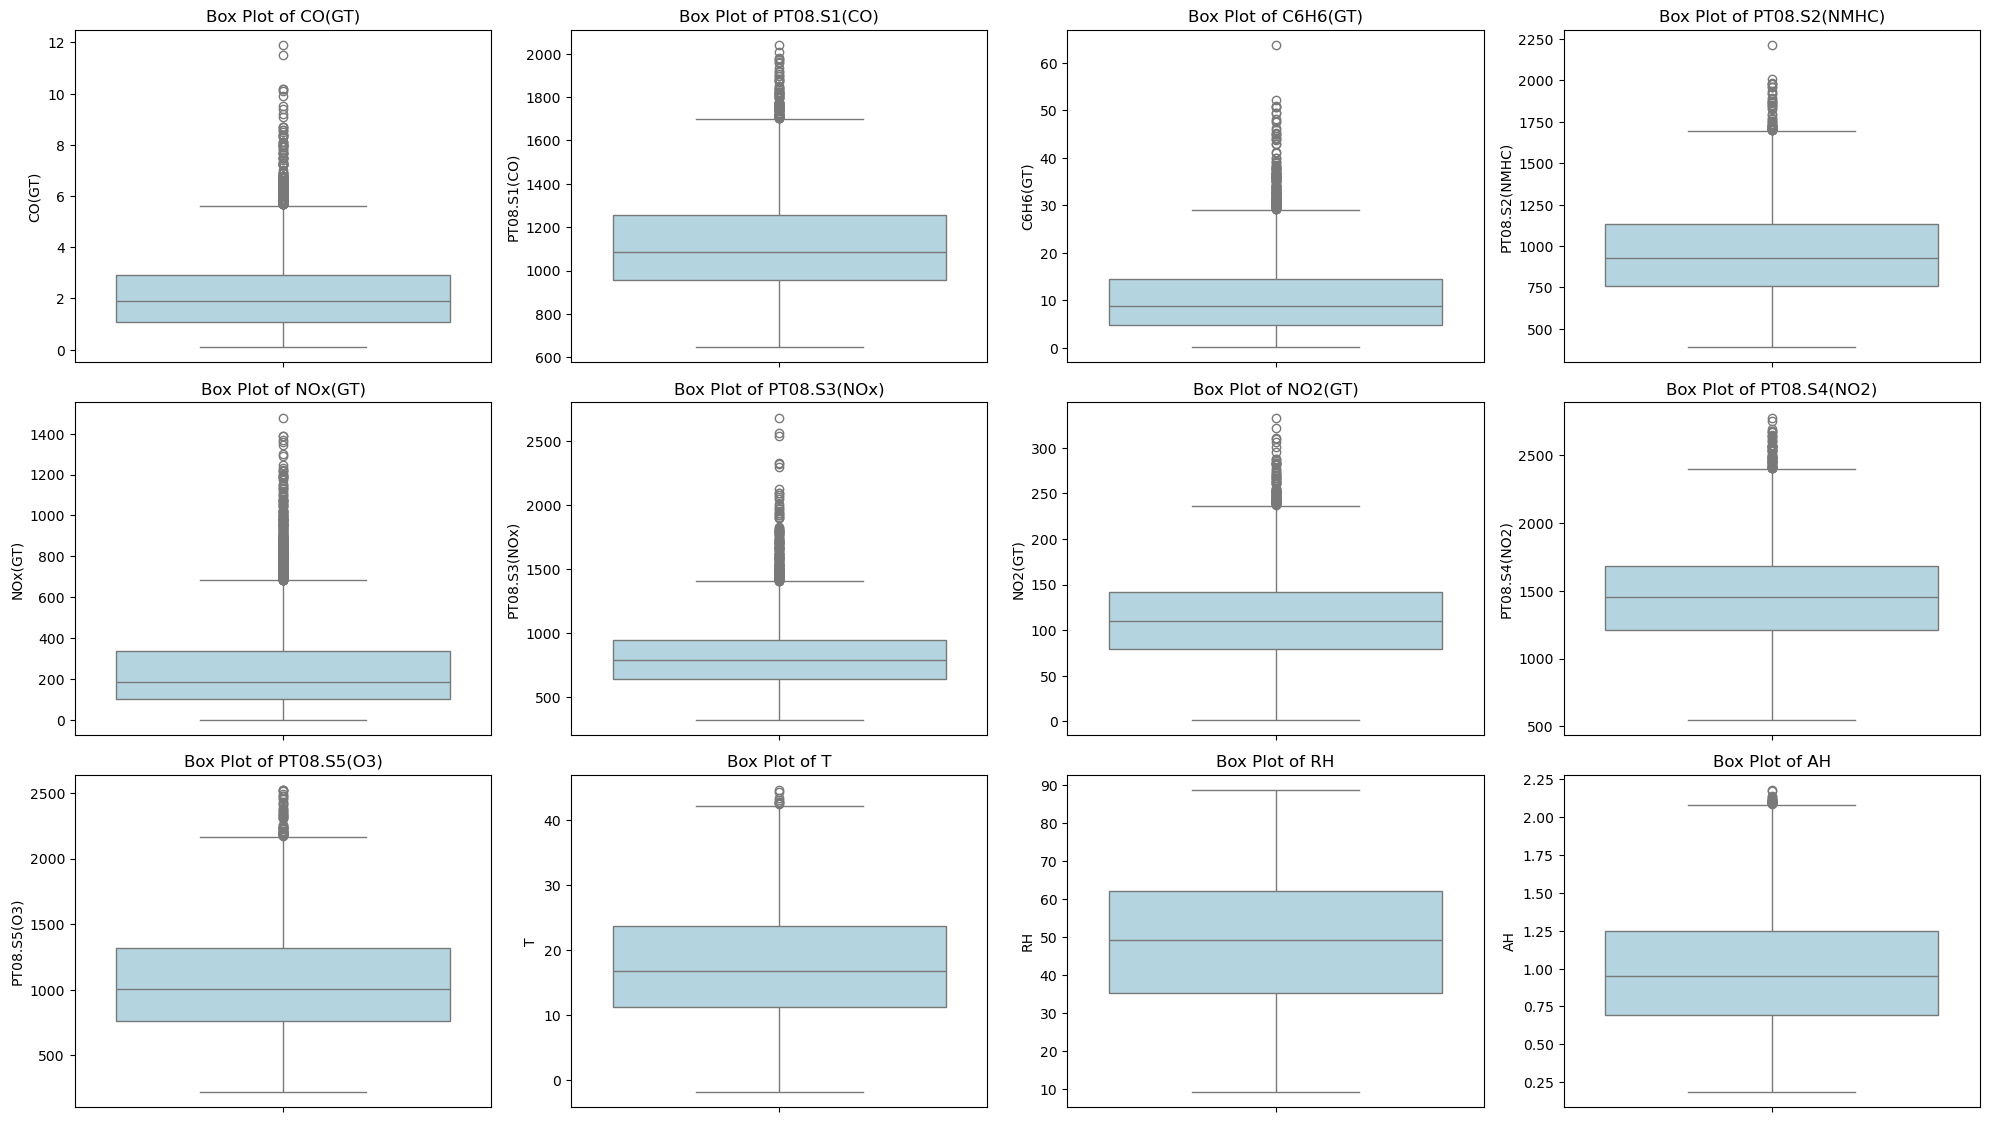

In [21]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create box plots for each numeric column in final_data
for i, column in enumerate(data_cleaned.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)  # Adjust the subplot layout as necessary
    sns.boxplot(data_cleaned, y=column, color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

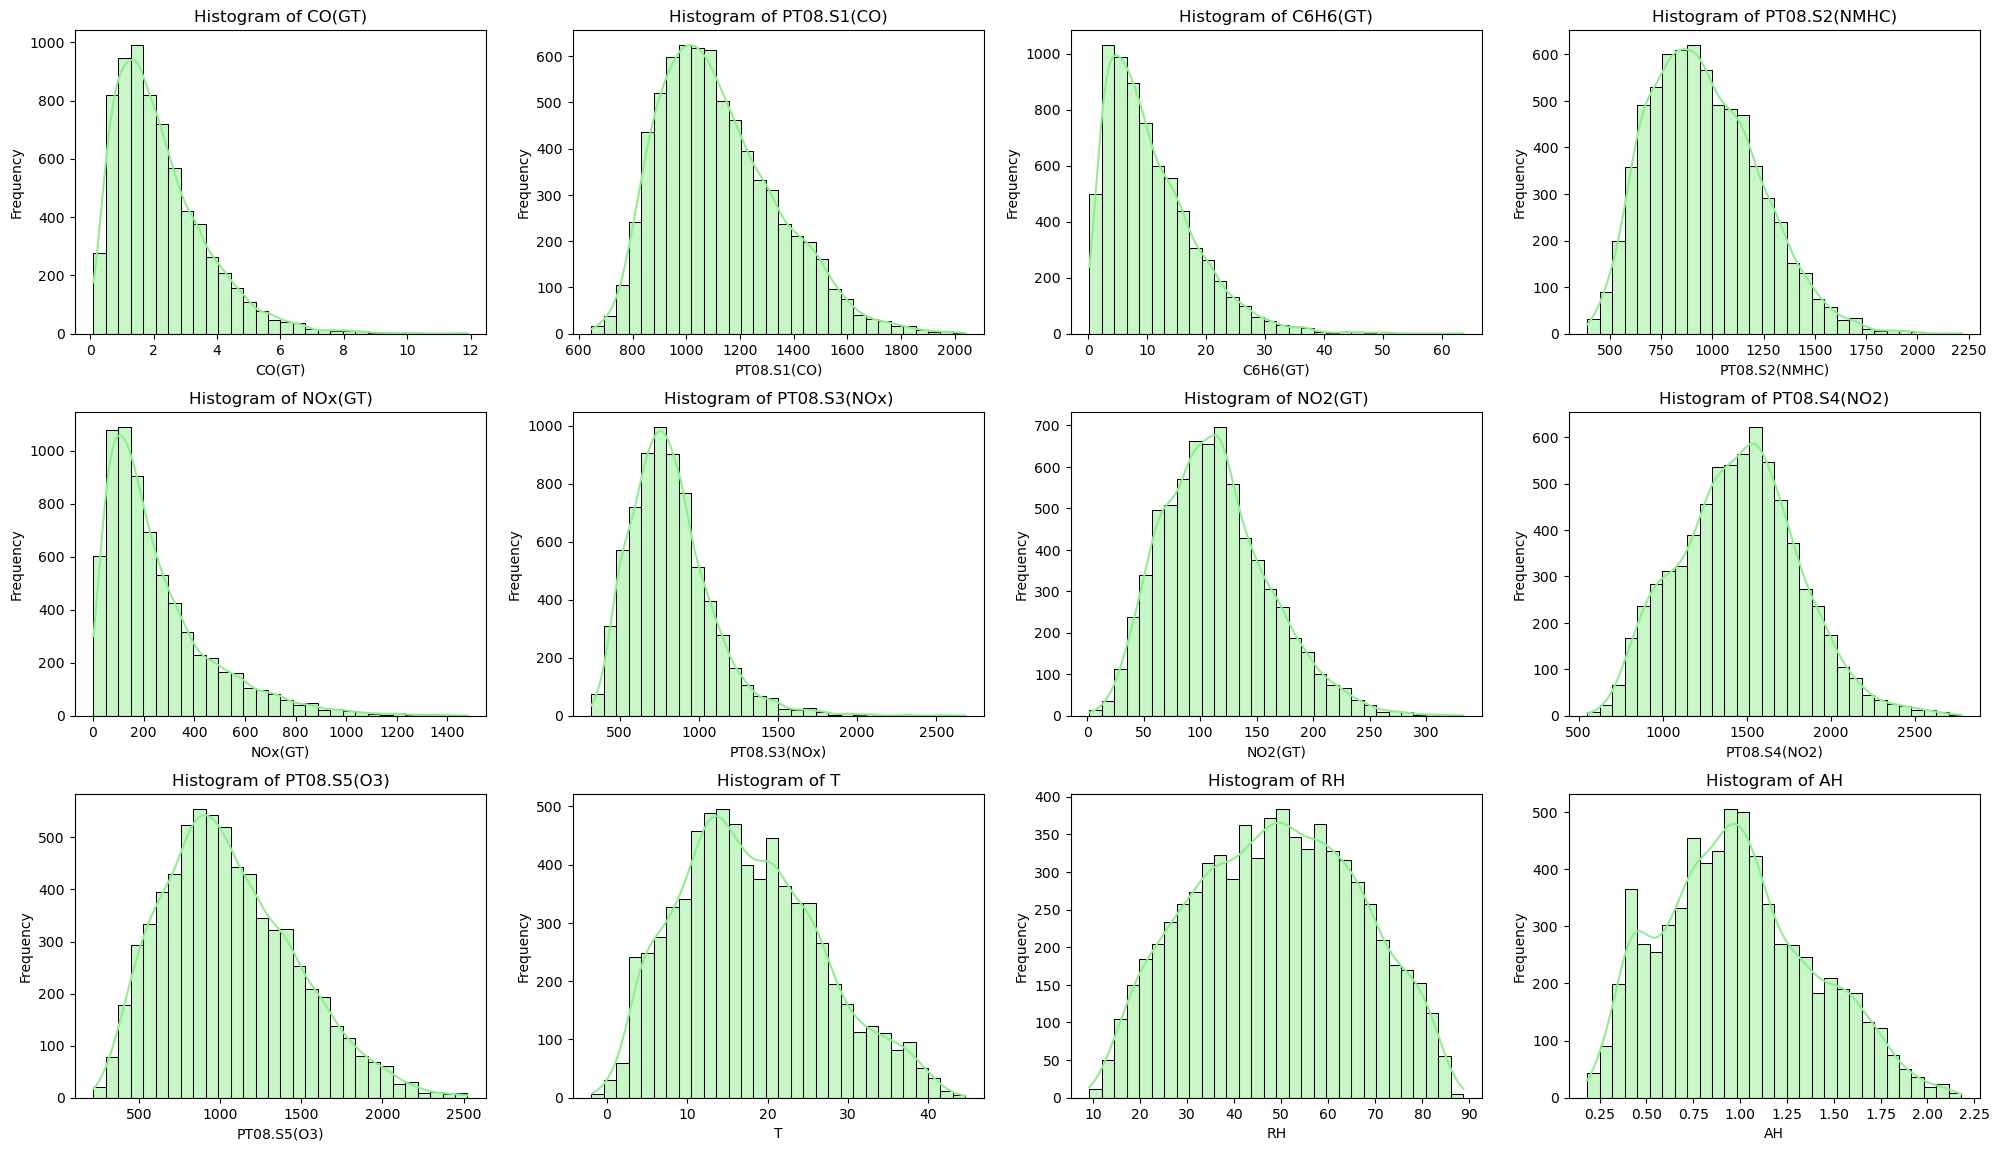

In [22]:
plt.figure(figsize=(20, 15))

# Create histograms for each numeric column in final_data
for i, column in enumerate(data_cleaned.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)  # Adjust the subplot layout as necessary
    sns.histplot(data_cleaned[column], bins=30, kde=True, color='lightgreen')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data Correlation Analysis

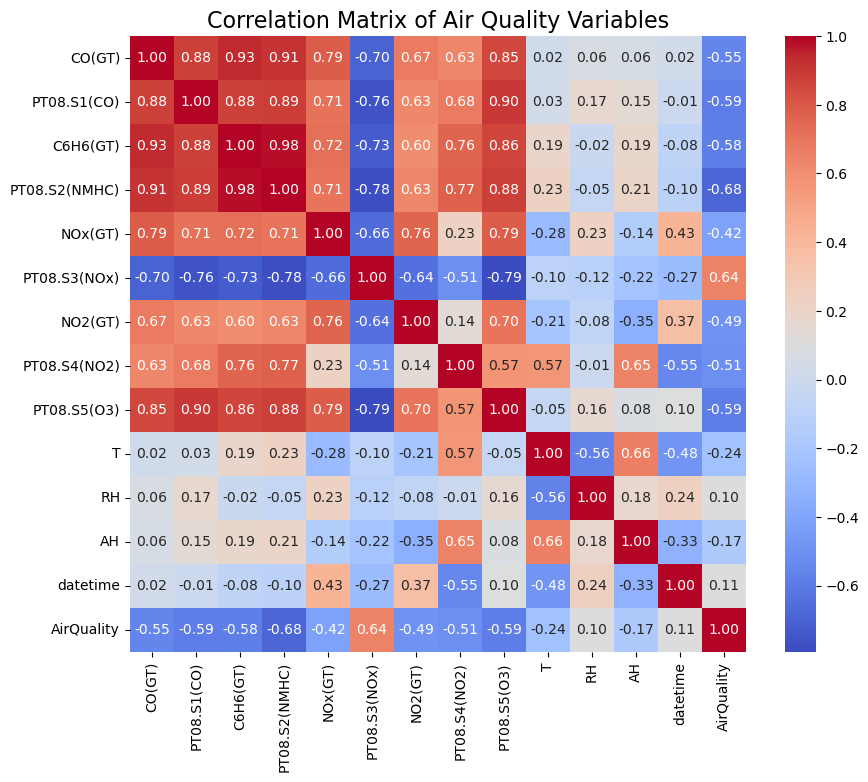

In [24]:
# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set title and labels
plt.title('Correlation Matrix of Air Quality Variables', fontsize=16)
plt.show()

### Strong correlations from the matrix:

- CO(GT) & PT08.S1(CO): 0.88
- C6H6(GT) & PT08.S2(NMHC): 0.98
- NOx(GT) & PT08.S3(NOx): 0.79
- NO2(GT) & PT08.S4(NO2): 0.70
- PT08.S5(O3) & CO(GT): 0.85
- T & AH: 0.66
- AirQuality & CO(GT): -0.55
- AirQuality & C6H6(GT): -0.59
- AirQuality & NOx(GT): -0.42

### Summary

Strong positive correlations indicate that pollutants often increase together, while strong negative correlations with air quality show that higher pollutant levels worsen air quality. These insights help guide further air quality analysis and model building.

## Logistic Regression

In [27]:
 data_cleaned.shape

(6941, 14)

In [28]:
# Step 1: Define features and target variable
X = data_cleaned.drop(columns=['AirQuality','datetime'])  # Features
y = data_cleaned['AirQuality']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47895810)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (5552, 12)
y_train shape:  (5552,)
X_test shape:  (1389, 12)
y_test shape:  (1389,)
      CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
2584     2.3       1109.0      12.7         1074.0    187.0         761.0   
5824     1.5        850.0       4.8          755.0    293.0         966.0   
4897     5.7       1636.0      30.1         1553.0    514.0         449.0   
8533     0.5        779.0       1.0          500.0    134.0        1361.0   
1918     0.6        865.0       5.1          767.0     76.0        1279.0   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
2584    144.0        1734.0       1274.0  30.0  25.6  1.0674  
5824    116.0        1051.0        714.0  12.1  46.5  0.6530  
4897    166.0        2130.0       1745.0  23.6  54.4  1.5687  
8533     84.0         652.0        313.0  -0.6  41.4  0.2478  
1918     75.0        1369.0        559.0  23.8  29.2  0.8499  
2584    0
5824    1
4897    0
8533    1
1918    0
Name: Air

In [29]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Making predictions on training and testing data
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

# Calculating F1-Score for training and testing data
train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

# Calculating accuracy for training and testing data
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)

# Calculating Precision and Recall for training and testing data
precision_train = precision_score(y_train, y_hat_train)
recall_train = recall_score(y_train, y_hat_train)

precision_test = precision_score(y_test, y_hat_test)
recall_test = recall_score(y_test, y_hat_test)

# Confusion matrix for training and testing data
conf_matrix_train = confusion_matrix(y_train, y_hat_train)
conf_matrix_test = confusion_matrix(y_test, y_hat_test)

# Reporting the results
print(f"Training F1-Score: {train_f1}")
print(f"Testing F1-Score: {test_f1}")
print(f"Accuracy score on training set: {accuracy_train}")
print(f"Accuracy score on testing set: {accuracy_test}")
print(f"Precision on Training Set: {precision_train}")
print(f"Recall on Training Set: {recall_train}")
print(f"Precision on Test Set: {precision_test}")
print(f"Recall on Test Set: {recall_test}")
print("Confusion Matrix on Training Set:\n", conf_matrix_train)
print("Confusion Matrix on Test Set:\n", conf_matrix_test)


Training F1-Score: 0.9235831809872029
Testing F1-Score: 0.9291784702549575
Accuracy score on training set: 0.9623559077809798
Accuracy score on testing set: 0.9640028797696184
Precision on Training Set: 0.9307295504789977
Recall on Training Set: 0.9165457184325109
Precision on Test Set: 0.9398280802292264
Recall on Test Set: 0.9187675070028011
Confusion Matrix on Training Set:
 [[4080   94]
 [ 115 1263]]
Confusion Matrix on Test Set:
 [[1011   21]
 [  29  328]]


## Future Selection

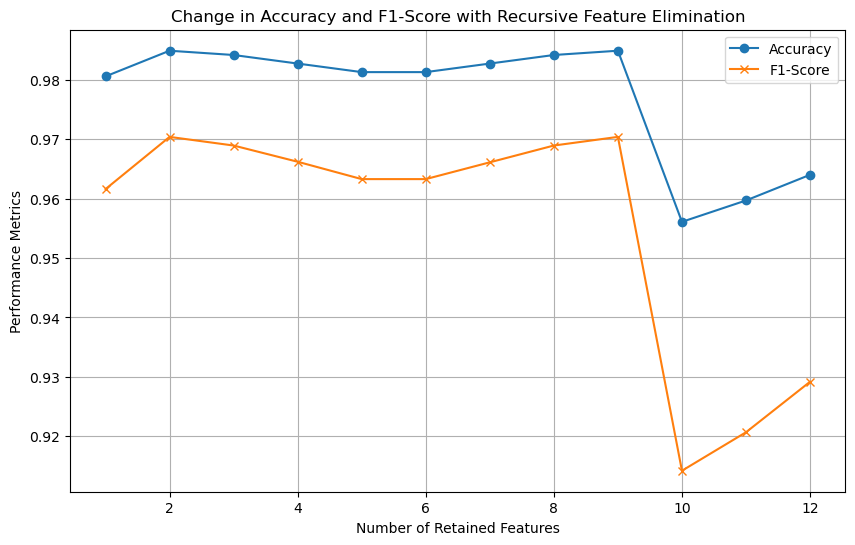

In [32]:
# List for F1 and accuracy
accuracy_list = []
f1_list = []
model = LogisticRegression()

for n_features_to_select in range(1, X_train.shape[1] + 1):
    
    # Apply RFE
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    
    # Prediction
    y_test_pred = rfe.predict(X_test)
    
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # append the result
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), accuracy_list, label='Accuracy', marker='o')
plt.plot(range(1, X_train.shape[1] + 1), f1_list, label='F1-Score', marker='x')
plt.xlabel('Number of Retained Features')
plt.ylabel('Performance Metrics')
plt.title('Change in Accuracy and F1-Score with Recursive Feature Elimination')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Apply RFE with the optimal number of features (9)
rfe_optimal = RFE(model, n_features_to_select=9)

# Fit the RFE model on the training data
rfe_optimal.fit(X_train, y_train)

# Get the selected features (the retained 9 features)
selected_features = X_train.columns[rfe_optimal.support_]

# Display the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'T', 'RH', 'AH'],
      dtype='object')


I have decided to select 9 features because of their high accuracy and F1-scores, and I did not choose 2 features because the determination of variable Y is based on only 2 constraints.

In [35]:
# Filter data with the selected feature
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Make a new model
rfe_model = LogisticRegression()

# New model with selected feture
rfe_model.fit(X_train_selected, y_train)

y_test_pred = rfe_model.predict(X_test_selected)

# Evaluasi performance model
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Calculate Precision and Recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy rfe: {accuracy}")
print(f"F1-Score rfe: {f1}")
print(f"Precision (RFE): {precision}")
print(f"Recall (RFE): {recall}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy rfe: 0.9848812095032398
F1-Score rfe: 0.9703808180535967
Precision (RFE): 0.9772727272727273
Recall (RFE): 0.9635854341736695
Confusion Matrix:
 [[1024    8]
 [  13  344]]


## 1-NN

In [37]:
# Initialize the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier with the selected features
knn.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
# Make predictions
y_train_pred = knn.predict(X_train_selected)
y_test_pred = knn.predict(X_test_selected)

# Calculate accuracy and F1-score for the training and testing
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate Precision and Recall for training and testing
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Compute the confusion matrix for training and testing
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy}")
print(f"Training F1-Score: {train_f1}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print("Confusion Matrix on Training Set:\n", conf_matrix_train)

print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing F1-Score: {test_f1}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print("Confusion Matrix on Test Set:\n", conf_matrix_test)

Training Accuracy: 1.0
Training F1-Score: 1.0
Training Precision: 1.0
Training Recall: 1.0
Confusion Matrix on Training Set:
 [[4174    0]
 [   0 1378]]
Testing Accuracy: 0.978401727861771
Testing F1-Score: 0.9578651685393258
Testing Precision: 0.9605633802816902
Testing Recall: 0.9551820728291317
Confusion Matrix on Test Set:
 [[1018   14]
 [  16  341]]


## KNN

In [40]:
# Define the parameter grid for K - KNN
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up the GridSearchCV with 5-fold cross-validation and accuracy as the scoring metric
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data (using the selected features from Step 2.3)
grid_search.fit(X_train_selected, y_train)

# Get the best value for K
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Print the best K and the corresponding accuracy
print(f"Best K: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")

Best K: 15
Best Cross-Validation Accuracy: 0.9823485051207823


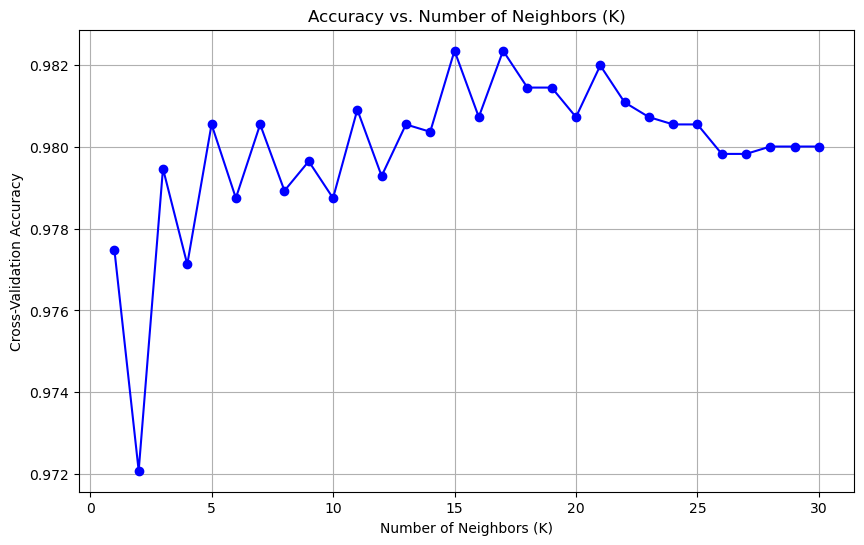

In [41]:
# Extract the cross-validation results for all values of K
cv_results = grid_search.cv_results_

# Plot the mean test accuracy for each K
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], cv_results['mean_test_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.show()

In [42]:
# Train the KNN classifier with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_selected, y_train)

# Make predictions on both training and testing sets
y_train_pred = knn_best.predict(X_train_selected)
y_test_pred = knn_best.predict(X_test_selected)

# Calculate accuracy and F1-score for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate accuracy and F1-score for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate Precision and Recall for training and testing
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Compute the confusion matrix for training and testing
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print the results for the best K value
print(f"Training Accuracy with Best K ({best_k}): {train_accuracy}")
print(f"Training F1-Score with Best K ({best_k}): {train_f1}")
print(f"Testing Accuracy with Best K ({best_k}): {test_accuracy}")
print(f"Testing F1-Score with Best K ({best_k}): {test_f1}")
print(f"Training Precision with Best K ({best_k}): {train_precision}")
print(f"Training Recall with Best K ({best_k}): {train_recall}")
print(f"Testing Precision with Best K ({best_k}): {test_precision}")
print(f"Testing Recall with Best K ({best_k}): {test_recall}")
print("Confusion Matrix on Training Set:\n", conf_matrix_train)
print("Confusion Matrix on Test Set:\n", conf_matrix_test)

Training Accuracy with Best K (15): 0.9828890489913544
Training F1-Score with Best K (15): 0.9658396260338008
Testing Accuracy with Best K (15): 0.978401727861771
Testing F1-Score with Best K (15): 0.958217270194986
Training Precision with Best K (15): 0.9572344975053457
Training Recall with Best K (15): 0.974600870827286
Testing Precision with Best K (15): 0.9529085872576177
Testing Recall with Best K (15): 0.9635854341736695
Confusion Matrix on Training Set:
 [[4114   60]
 [  35 1343]]
Confusion Matrix on Test Set:
 [[1015   17]
 [  13  344]]


## Decision Tree

In [103]:
# Assuming data_cleaned is your DataFrame
X = data_cleaned.drop(columns=['AirQuality','datetime'])  # Replace with your selected features
y = data_cleaned['AirQuality']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [107]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

# Calculate Precision and Recall for training and testing
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)

test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training F1-Score:", train_f1)
print("Testing F1-Score:", test_f1)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Training F1-Score: 1.0
Testing F1-Score: 1.0
Training Precision: 1.0
Training Recall: 1.0
Testing Precision: 1.0
Testing Recall: 1.0
Confusion Matrix (Test Set):
 [[1061    0]
 [   0  328]]


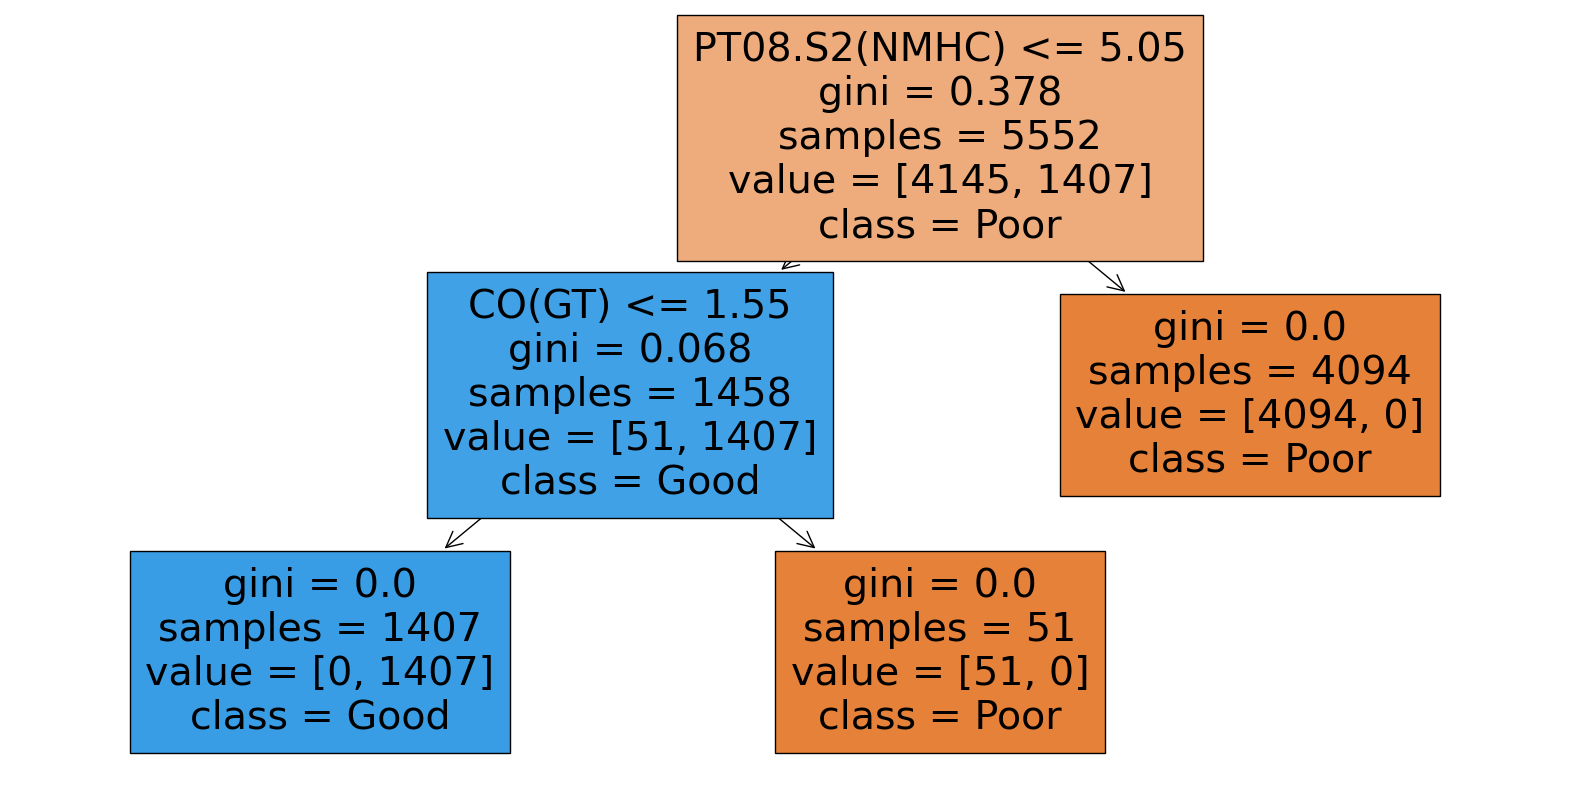

In [109]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=selected_features, class_names=['Poor', 'Good'], filled=True)
plt.show()

The Decision Tree visualization shows how the model classifies air quality. The root node splits the data based on C6H6(GT using a threshold of ≤ 5.05 which has a Gini impurity of 0.378 indicating some uncertainty in classification. The first split divides the data based on CO(GT) with Gini impurity going down to 0.068 and 1,458 samples mainly classified as Good with 51 Good and 1,407 Poor. The leaf nodes show that for samples where CO(GT) is ≤ 1.55 all 1,407 are classified as Poor with a Gini of 0.0 while for CO(GT) > 1.55, 4,094 samples are also Poor. Also the leaf for C6H6(GT) > 5.05 has 51 samples classified as Poor. This visualization emphasizes how easy it is to understand the model showing the importance of features like C6H6(GT) and CO(GT) in classification. Overall it highlights the model's effectiveness in classifying air quality and offers valuable insights for public health and environmental management decisions.

## Visualization

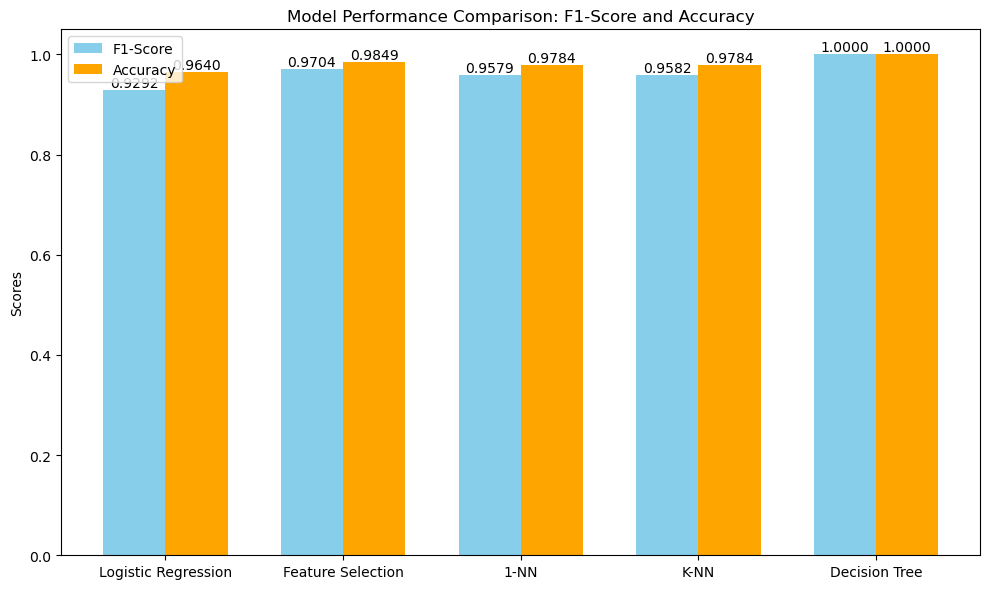

In [50]:
# Data for visualization
models = ['Logistic Regression', 'Feature Selection', '1-NN', 'K-NN', 'Decision Tree']
f1_scores = [0.9292, 0.9704, 0.9579, 0.9582, 1]  # F1-Scores
accuracies = [0.9640, 0.9849, 0.9784, 0.9784, 1]  # Accuracies

# Create a bar plot
x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting F1-Scores
bars1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='skyblue')

# Plotting Accuracies
bars2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='orange')

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison: F1-Score and Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding values on top of the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.4f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

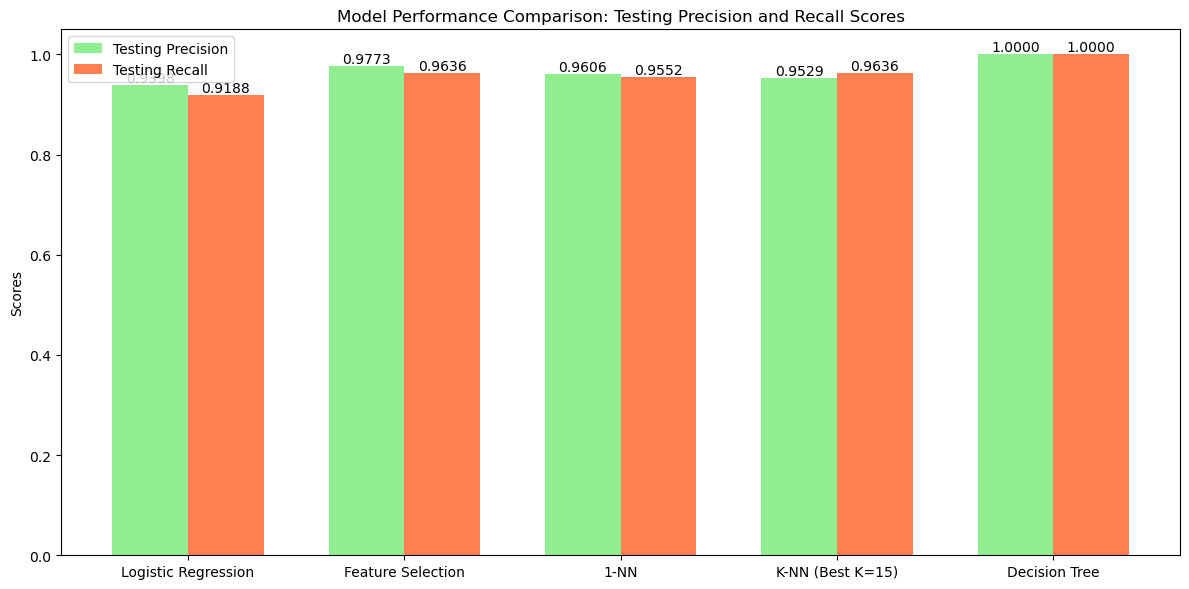

In [94]:
# Data for visualization
models = [
    'Logistic Regression',
    'Feature Selection',
    '1-NN',
    'K-NN (Best K=15)',
    'Decision Tree'
]

# Precision and Recall scores (replace with actual test values)
precision_scores = [
    0.9398,  # Logistic Regression (Test Precision)
    0.9773,  # Feature Selection (Test Precision)
    0.9606,  # 1-NN (Test Precision)
    0.9529,  # K-NN (Test Precision)
    1.0       # Decision Tree (Test Precision)
]

recall_scores = [
    0.9188,  # Logistic Regression (Test Recall)
    0.9636,  # Feature Selection (Test Recall)
    0.9552,  # 1-NN (Test Recall)
    0.9636,  # K-NN (Test Recall)
    1.0       # Decision Tree (Test Recall)
]

# Create a bar plot
x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Precision Scores
bars1 = ax.bar(x - width/2, precision_scores, width, label='Testing Precision', color='lightgreen')

# Plotting Recall Scores
bars2 = ax.bar(x + width/2, recall_scores, width, label='Testing Recall', color='coral')

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison: Testing Precision and Recall Scores')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding values on top of the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.4f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

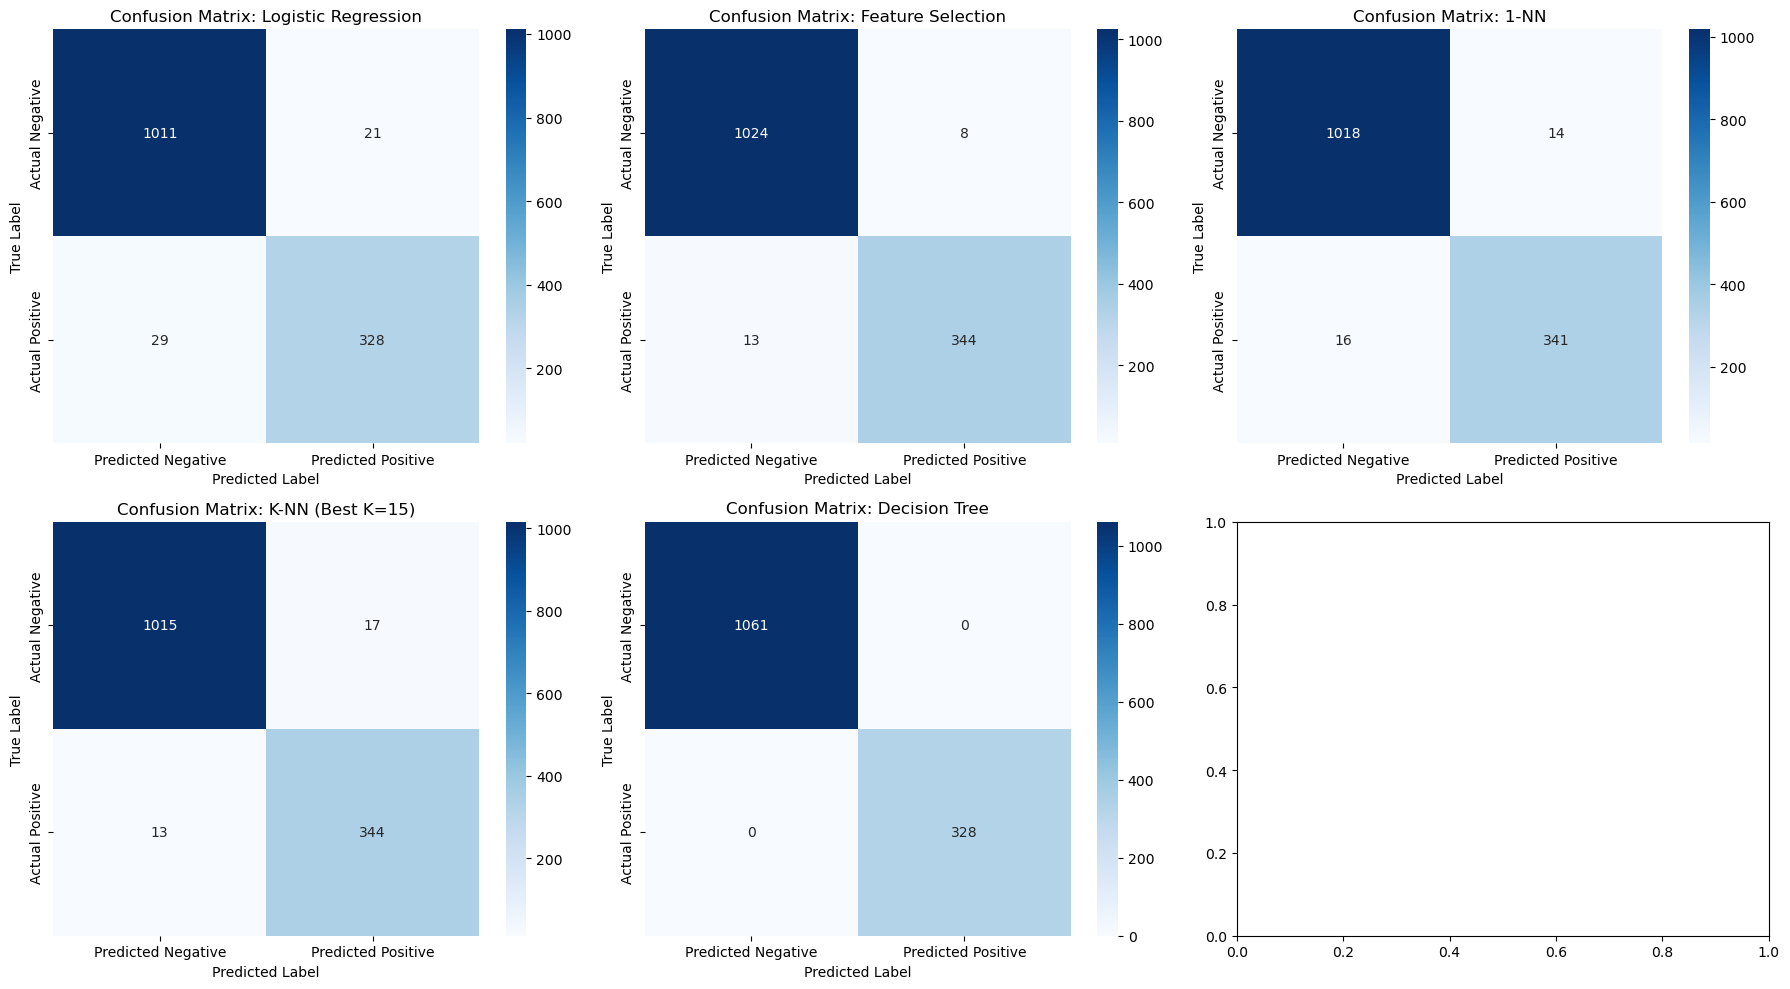

In [98]:
# Example confusion matrices (replace with your actual confusion matrices)
confusion_matrices = {
    'Logistic Regression': np.array([[1011, 21],
                                     [29, 328]]),  # Replace with your confusion matrix
    'Feature Selection': np.array([[1024, 8],
                                    [13, 344]]),  # Replace with your confusion matrix
    '1-NN': np.array([[1018, 14],
                      [16, 341]]),  # Replace with your confusion matrix
    'K-NN (Best K=15)': np.array([[1015, 17],
                                   [13, 344]]),  # Replace with your confusion matrix
    'Decision Tree': np.array([[1061, 0],
                                [0, 328]])  # Replace with your confusion matrix
}

# Create a heatmap for each confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten to easily access axes

for i, (model, matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
                 ax=axes[i],
                 xticklabels=['Predicted Negative', 'Predicted Positive'], 
                 yticklabels=['Actual Negative', 'Actual Positive'])
    
    axes[i].set_title(f'Confusion Matrix: {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()

## Conclusion of Classification Model Evaluation

1. Logistic Regression:
    - F1-Score of 0.929 on the test data shows a good balance between precision and recall.
    - Accuracy is 96.4%, indicating that the model predicts well.
    - Precision on test data is 0.9398, meaning the model is accurate in identifying positives with few false positives. However, there is a slight drop in recall at 0.9188, indicating that it misses some actual positive cases.
    - Confusion matrix shows 1011 true positives and 21 false positives, with 29 false negatives, suggesting some errors in predicting negatives.
    
2. Feature Selection:
    - F1-Score improves to 0.970 on test data, indicating better performance.
    - Accuracy increases to 98.5%, showing that selecting the right features enhances model performance.
    - Precision is at 0.9773 and recall is at 0.9636, demonstrating the model's effectiveness in correctly identifying positive cases with very few errors.
    - Confusion matrix reveals 1024 true positives and only 8 false positives, showing high effectiveness.
      
3. 1-NN (One Nearest Neighbor):
    - Achieves perfect F1-Score and accuracy of 1.0 on training data, and a very high accuracy of 97.8% on test data.
    - Precision and recall are both very high, around 1.0 for training and about 0.960 for test, indicating the model is very reliable in classification.
    - Confusion matrix has 1018 true positives and only 14 false positives, demonstrating excellent performance.

4. K-NN (K-Nearest Neighbors):
    - Has accuracy of 97.8% and an F1-Score of 0.958 on test data, indicating solid performance.
    - Precision is 0.9529 while recall is 0.9636, suggesting a good balance, with slight improvements on the recall side.
    - Confusion matrix indicates 1015 true positives and 17 false positives, showing good results overall.

5. Decision Tree:
    - Displays perfect performance with an F1-Score and accuracy of 1.0 for both training and testing datasets.
    - Both precision and recall metrics also reach 1.0, indicating no classification errors on the test data.
    - Confusion matrix confirms that all predictions are classified correctly, with no false positives or false negatives.

### Summary:
Among all models tested, Decision Tree stands out with perfect accuracy and F1-Score on the test data. However, Feature Selection also shows significant improvement due to effective feature selection. Other models, like Logistic Regression, 1-NN, and K-NN, also perform well, though with minor variations in precision and recall.

In conclusion, the choice of features and the selection of the right model are crucial for enhancing classification performance. The decision to use a specific model should depend on the specific needs of the analysis being conducted.